# Decision Tree for High Sales on Company Data

In [1]:
#Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [105]:
#Load the dataset
company_data = pd.read_csv('C:\Data Science\Assignments\Decision Tree\Company_Data.csv')
company_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [106]:
company_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [107]:
company_data.describe

<bound method NDFrame.describe of      Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     

In [108]:
#Check for missing values
company_data.isnull().any()

Sales          False
CompPrice      False
Income         False
Advertising    False
Population     False
Price          False
ShelveLoc      False
Age            False
Education      False
Urban          False
US             False
dtype: bool

In [109]:
company_data.shape

(400, 11)

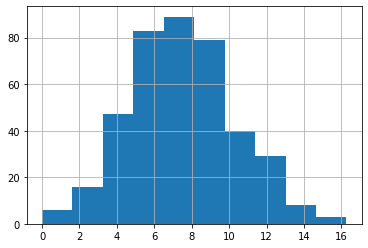

In [110]:
#Histogram of Taxable income
#hist.fraudcheck_data['Taxable.Income']
#fraudcheck_data['Taxable.Income'].plot(kind='box', subplots=True, layout=(3,3), sharex=True, sharey=True)
company_data['Sales'].hist()

In [111]:
# Add a new column named 'Class' # if sales greater than 8 unit sales in thousands then sales is high else Low
company_data['class'] = ['Low' if x <= 8 else 'High' for x in company_data['Sales']] 

# Print the DataFrame 
print(company_data['class'])


0      High
1      High
2      High
3       Low
4       Low
       ... 
395    High
396     Low
397     Low
398     Low
399    High
Name: class, Length: 400, dtype: object


In [112]:
#Convert this to numerical
company_data['class'] = company_data['class'].map({'Low': 0, 'High': 1}).astype(int)
print(company_data['class'])


0      1
1      1
2      1
3      0
4      0
      ..
395    1
396    0
397    0
398    0
399    1
Name: class, Length: 400, dtype: int32


In [113]:
class_counts = company_data.groupby('class').size()
print(class_counts)
company_data.head()
#company_data.shape

class
0    236
1    164
dtype: int64


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,class
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,1
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,1
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,1
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,0
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,0


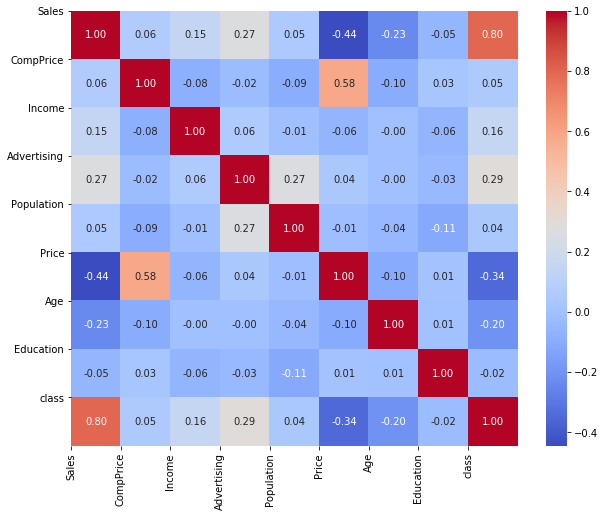

In [114]:
#Data Visualization
corr = company_data.corr()

#Plot
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt = ".2f")
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

In [115]:
# Let's see how many unique categories we have in these categorical features
shelve_set = set(company_data['ShelveLoc'])
print(shelve_set)

Urban_set = set(company_data['Urban'])
print(Urban_set)

US_set = set(company_data['US'])
print(US_set)

{'Good', 'Medium', 'Bad'}
{'Yes', 'No'}
{'Yes', 'No'}


In [116]:
# Now we map them as numbers instead of their names.
company_data['ShelveLoc'] = company_data['ShelveLoc'].map({'Bad': 0, 'Medium': 1, 'Good':2}).astype(int)
print(company_data['ShelveLoc'])

0      0
1      2
2      1
3      1
4      0
      ..
395    2
396    1
397    1
398    0
399    2
Name: ShelveLoc, Length: 400, dtype: int32


In [117]:
# Now we map them as numbers instead of their names.
company_data['Urban'] = company_data['Urban'].map({'No': 0, 'Yes': 1}).astype(int)
print(company_data['Urban'])

0      1
1      1
2      1
3      1
4      1
      ..
395    1
396    0
397    1
398    1
399    1
Name: Urban, Length: 400, dtype: int32


In [118]:
# Now we map them as numbers instead of their names.
company_data['US'] = company_data['US'].map({'No': 0, 'Yes': 1}).astype(int)
print(company_data['US'])

0      1
1      1
2      1
3      1
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: US, Length: 400, dtype: int32


In [119]:
#company_data.head()
company_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    int32  
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    int32  
 10  US           400 non-null    int32  
 11  class        400 non-null    int32  
dtypes: float64(1), int32(4), int64(7)
memory usage: 31.4 KB


In [120]:
# separate array into input and output components
X = company_data.iloc[:,1:11].values
Y = company_data.iloc[:,11].values
names = company_data.iloc[:,0:12].columns


#Splitting the dataset into training and test data-set
# Evaluate using a train and a test set
from sklearn.model_selection import train_test_split
test_size = 0.30
seed = 8
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
print(X_train)
print(X_test)
print(Y_train)
print(Y_test)

[[159  80   0 ...  18   1   0]
 [135  93   2 ...  11   1   1]
 [134  48   1 ...  12   1   1]
 ...
 [132  98   2 ...  12   1   1]
 [131  25  10 ...  15   0   1]
 [140  29   0 ...  16   1   0]]
[[149  69  20 ...  13   1   1]
 [136 119   6 ...  13   1   1]
 [109  64  13 ...  17   1   1]
 ...
 [108  77  13 ...  14   1   1]
 [147  40   0 ...  10   1   0]
 [117  93   4 ...  11   1   1]]
[1 0 0 1 1 0 1 1 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0
 0 1 1 1 0 1 1 1 0 0 1 0 0 0 1 1 0 0 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0
 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0
 1 1 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 1 1 0 1 1 0
 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 1 0
 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 1 0]
[1 0 0 1 1 0 0 0 0 0 1 0 1 1 0 1 0 1 1 0 1 1 0 

In [121]:
#Feature Scaling
#Data Normalization
# Standardize data (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler
from numpy import set_printoptions
#Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# summarize transformed data
set_printoptions(precision=3)
print(X_train[0:11,:])
print(X_test[0:11,:])

[[ 2.22   0.428 -1.014  0.695  0.213  0.005 -1.722  1.506  0.671 -1.418]
 [ 0.659  0.887 -0.704 -1.314  0.131  0.005 -1.231 -1.081  0.671  0.705]
 [ 0.594 -0.704 -0.859 -0.824  1.198  0.005  0.671 -0.712  0.671  0.705]
 [ 1.179  0.322  2.86   1.28   1.65   0.005 -0.678  1.137  0.671  0.705]
 [-0.447  0.781  0.536 -1.403 -0.485  1.49  -1.415 -1.081 -1.489  0.705]
 [-0.382  1.064 -1.014 -1.648  0.418 -1.48   1.162  1.137 -1.489 -1.418]
 [-0.773 -1.234 -1.014 -1.675 -2.169  1.49  -0.985 -0.712  0.671 -1.418]
 [-1.423  0.463 -0.549  1.573 -2.538  0.005  0.733 -0.342  0.671 -1.418]
 [ 1.114  0.781 -0.859 -0.483 -0.157  1.49  -0.924 -1.451 -1.489  0.705]
 [ 0.073 -1.269  0.226 -1.124  0.665  0.005 -0.249  1.137  0.671  0.705]
 [-0.122 -1.093  1.31   0.599 -0.157  1.49  -1.599 -0.712  0.671  0.705]]
[[ 1.57   0.039  2.085  0.722  0.747  1.49   0.365 -0.342  0.671  0.705]
 [ 0.724  1.807 -0.084 -0.558  1.198  0.005 -1.169 -0.342  0.671  0.705]
 [-1.033 -0.138  1.    -1.505  0.131  0.005  0.426

In [122]:
#####################################################
# Feature Importance Method1
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
model=SelectFromModel(Lasso(alpha=0.05,random_state=8))
model.fit(X_train, Y_train)
print(model.get_support())
print(names)

[ True  True  True False  True  True  True False False False]
Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US', 'class'],
      dtype='object')


In [123]:
# Decide the Feature Importance with Extra Trees Classifier - Method2
from sklearn.ensemble import ExtraTreesClassifier

# feature extraction
model = ExtraTreesClassifier(n_estimators = 30, criterion ='gini',random_state=8)
model.fit(X_train, Y_train)
print(model.feature_importances_)
print(model.n_features_)
print(names)

[0.094 0.105 0.13  0.079 0.165 0.154 0.131 0.078 0.032 0.032]
10
Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US', 'class'],
      dtype='object')


In [124]:
# I am removing Urban and US features as they don't have much significance on the Sales
#New X_train and X_test mapping
X_train = X_train[:,0:8]
X_test = X_test[:,0:8]
names = company_data.iloc[:,1:9].columns

print(X_train.shape)
print(X_test.shape)
print(X_train[0:1,:])
print(X_test[0:1,:])
print(names)

(280, 8)
(120, 8)
[[ 2.22   0.428 -1.014  0.695  0.213  0.005 -1.722  1.506]]
[[ 1.57   0.039  2.085  0.722  0.747  1.49   0.365 -0.342]]
Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education'],
      dtype='object')


In [125]:
# I am skipping Urban ans US as they don't have much significance on the Sales
#CompPrice,Income,Advertising,Population,Price,ShelveLoc, Age and Education are independent variables X. Sales(class) is our dependent variable y.
#We now use the decisiontreeclassifier() function to fit in order to predict High using all the variables but Sales.
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train,Y_train)

In [126]:
#prediction
y_pred = classifier.predict(X_test)
#Accuracy
from sklearn import metrics
print('Accuracy Score Training:', metrics.accuracy_score(Y_test,y_pred))

Accuracy Score Training: 0.7416666666666667


In [127]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

[[53 19]
 [12 36]]


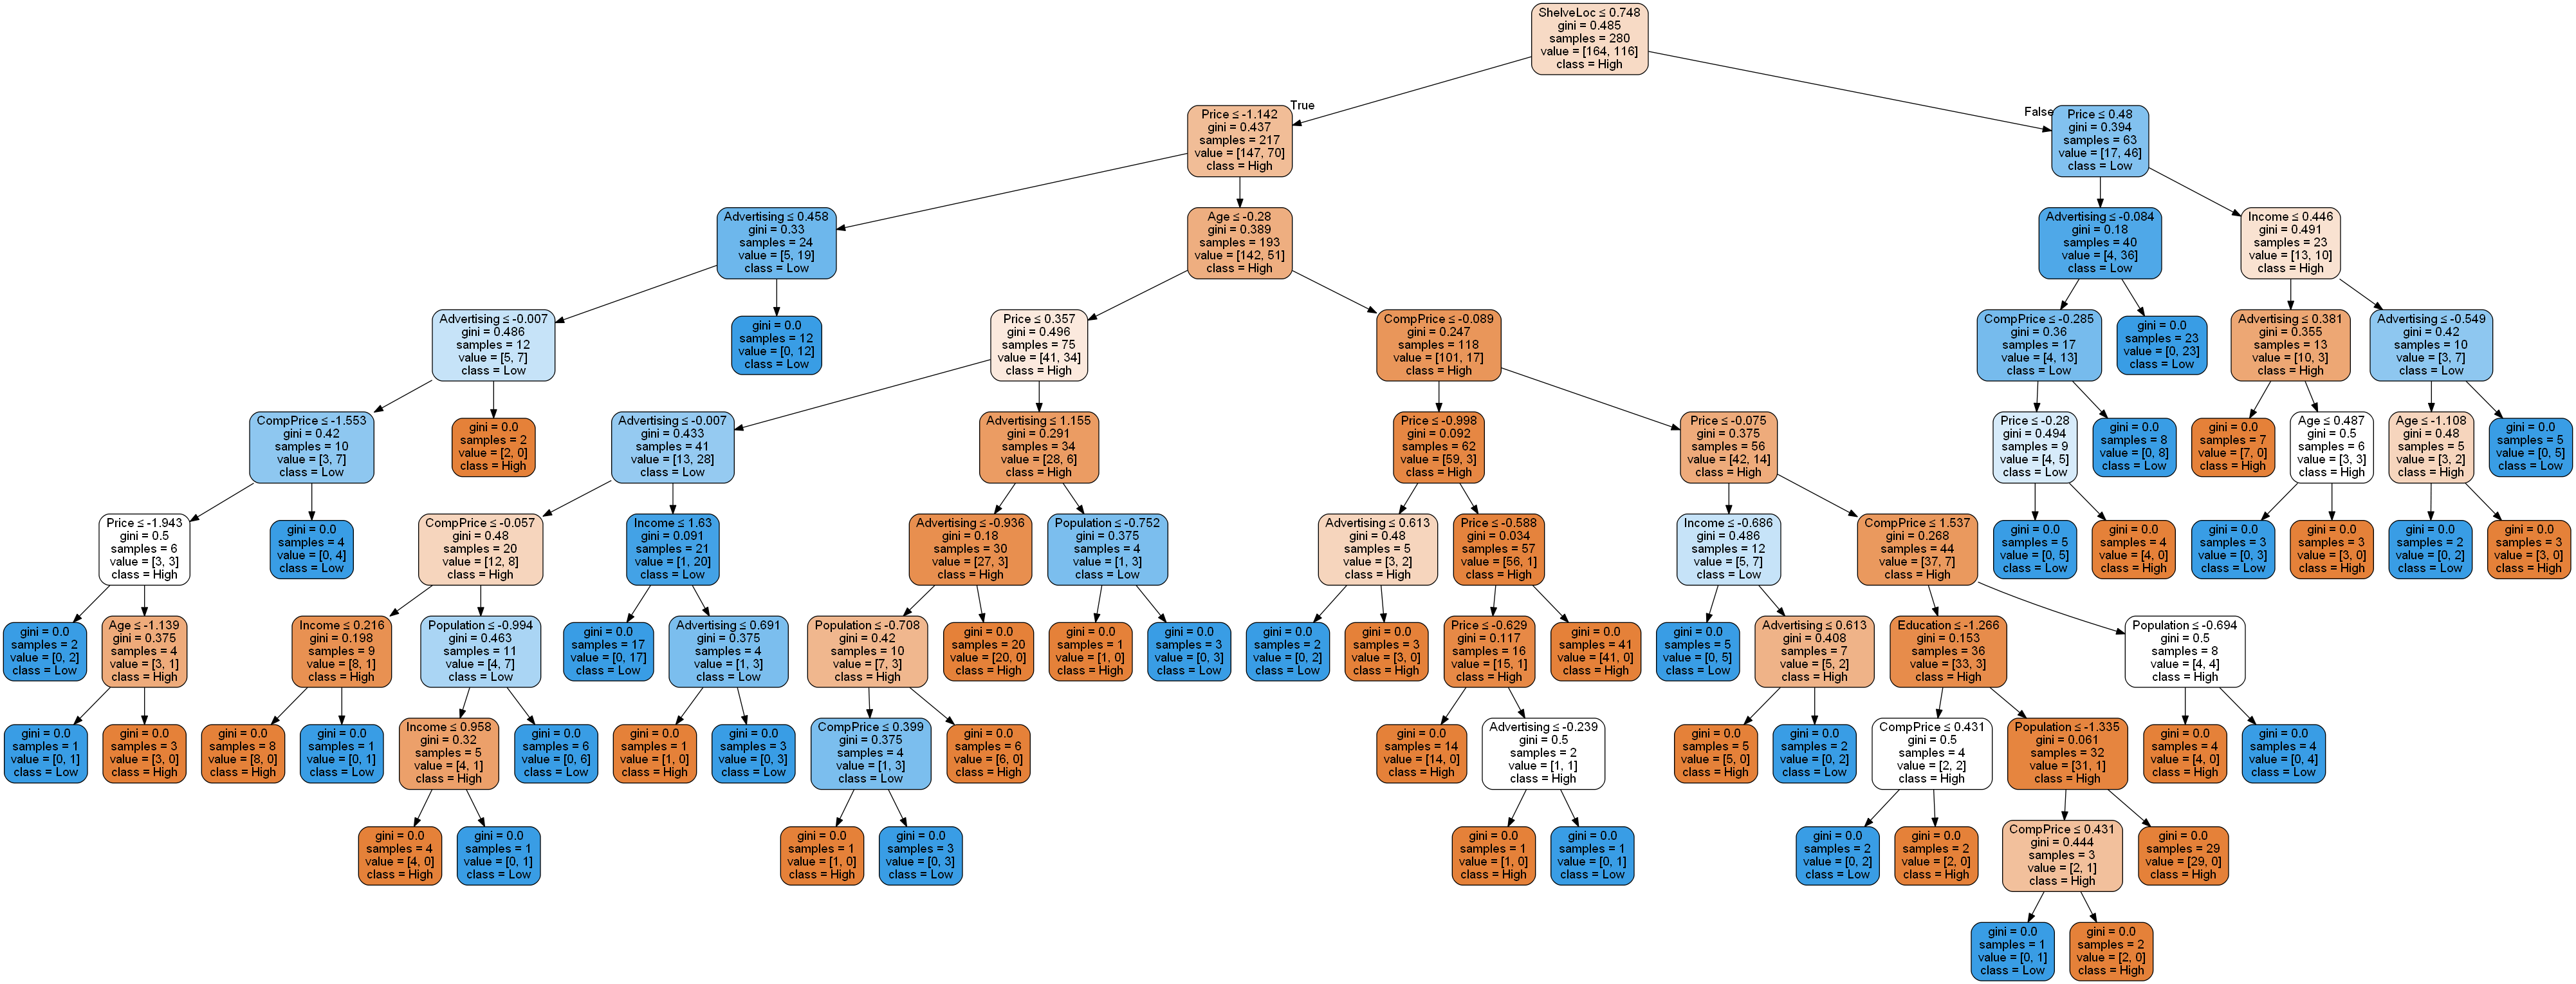

In [128]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/graphviz-2.38/release/bin'
names = ['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education']

dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names = names,class_names=['High','Low'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
print(graph)
Image(graph.create_png())

In [129]:
#The tree is a Overfit, needs pruning
#Create Decision Tree classifer object
classifier = DecisionTreeClassifier(criterion="entropy", max_depth=5)
# Train Decision Tree Classifer
classifier = classifier.fit(X_train,Y_train)
#Predict the response for test dataset
y_pred = classifier.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))
cm = confusion_matrix(Y_test, y_pred)
print(cm)
#Now the model accuracy has increased

Accuracy: 0.7666666666666667
[[63  9]
 [19 29]]


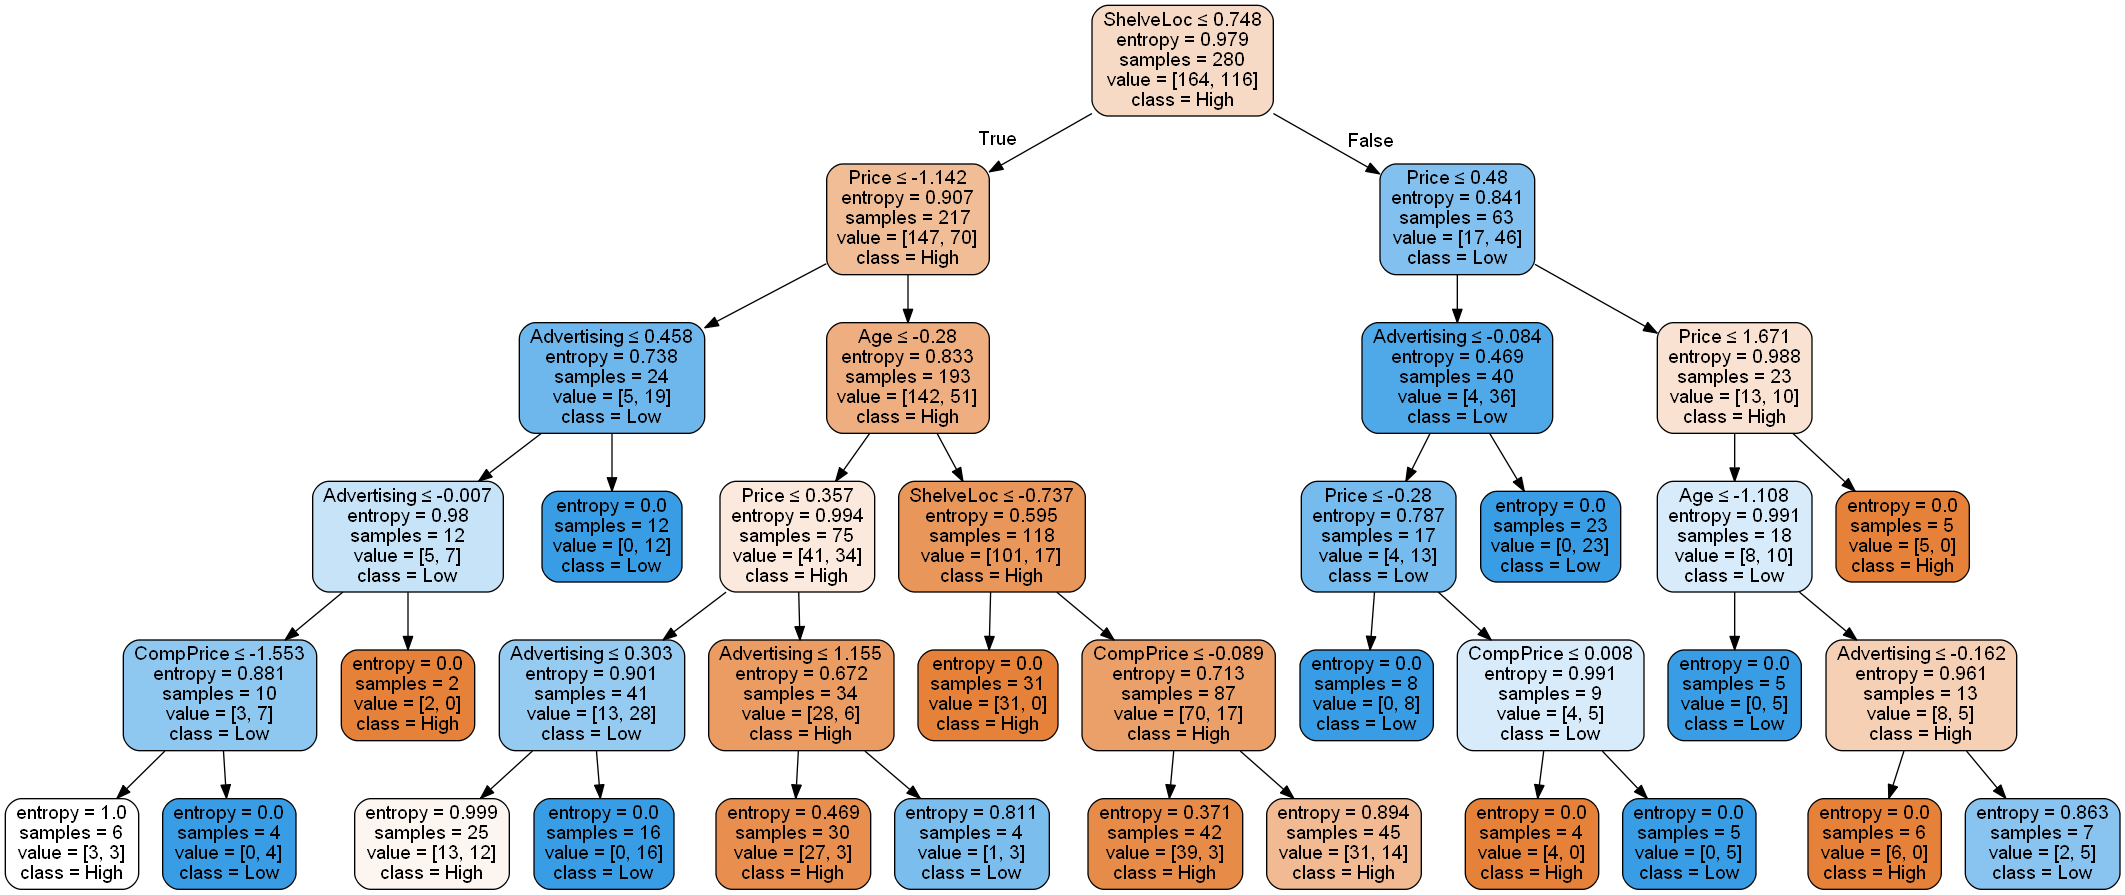

In [130]:
#revised Graphical Tree
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/graphviz-2.38/release/bin'
names = ['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education']

dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names = names,class_names=['High','Low'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
print(graph)
Image(graph.create_png())

LDA: 0.866667 (0.100000)
DT: 0.733333 (0.148137)
LR: 0.866667 (0.113039)
SVM: 0.616667 (0.124722)


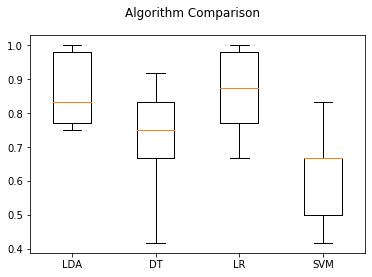

In [131]:
# Comparison of various Models
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression #importing logistc regression
from sklearn.svm import SVC #importing Svm 

# Evaluate Algorithms
# Test options and evaluation metric
num_folds = 10
seed = 5
scoring = 'accuracy'

# Check which algorithm is best Algorithms
models = []
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('SVM', SVC(kernel= 'poly', degree=2)))

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_test, Y_test, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#Based on comparison, LDA and LR are recommended Model for this classification problem
#However, since this assignment is for Decision Tree, going ahead with Decision Tree model

AB: 0.846429 (0.059868)
GBM: 0.792857 (0.084213)
RF: 0.782143 (0.075677)
ET: 0.792857 (0.057143)
BG: 0.760714 (0.075000)


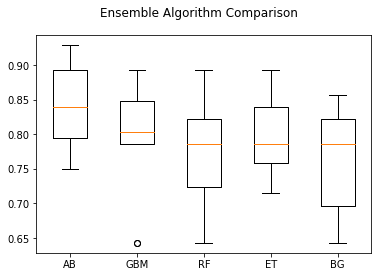

In [132]:
#Loading libraries
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier

# ensemble techniques
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
ensembles.append(('BG', BaggingClassifier()))

results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Compare Algorithms
fig = plt.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#Based on the output, we go with Adaboost ensemble technique

In [133]:
#import warnings
#warnings.filterwarnings("ignore")

#load libraries
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
     
# Create a DecisonTree
decisiontree = DecisionTreeClassifier()

# Create a pipeline 
pipe = Pipeline(steps=[('decisiontree', decisiontree)])

    
# Create lists of parameter for Decision Tree Classifier
criterion = ['gini', 'entropy']
max_depth = [4,5,6,7,8,9,10,11,12]

# Create a dictionary of all the parameter options 
# Note has you can access the parameters of steps of a pipeline by using '__’
parameters = dict(decisiontree__criterion=criterion,
                      decisiontree__max_depth=max_depth)

# Conduct Parameter Optmization With Pipeline
# Create a grid search object
clf = GridSearchCV(pipe, parameters,scoring='accuracy', cv=10,n_jobs=-1)

# Fit the grid search
clf.fit(X_train, Y_train)

# View The Best Parameters
print('Best Criterion:', clf.best_estimator_.get_params()['decisiontree__criterion'])
print('Best max_depth:', clf.best_estimator_.get_params()['decisiontree__max_depth'])
print(); print("best Score:", clf.best_score_)



# Use Cross Validation To Evaluate Model
CV_Result = cross_val_score(clf, X_test, Y_test, cv=10, n_jobs=-1)
print(); print(CV_Result)
print(); print(CV_Result.mean())
print(); print(CV_Result.std())

Best Criterion: entropy
Best max_depth: 6

best Score: 0.7

[0.75  0.833 0.75  1.    0.833 0.75  0.833 0.5   0.75  0.583]

0.7583333333333333

0.1314977819838292


In [135]:
#Final Best Model ------------------------------------
# Train Decision Tree Classifer
classifier = DecisionTreeClassifier(criterion="entropy", max_depth=6)
classifier = classifier.fit(X_train,Y_train)
y_pred= classifier.predict(X_test)

score = classifier.score(X_test,Y_test)
print("DT Model Test Accuracy", score)

score1 = classifier.score(X_train,Y_train)
print("DT Model Train Accuracy", score1)

cn = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix", cn)
print("************************")


#Finalize the Best Fit model - ensemble technique adaboost as per above observation
ada = AdaBoostClassifier(n_estimators=50,learning_rate=1)
ada.fit(X_train,Y_train)
y_pred= ada.predict(X_test)

adascore = ada.score(X_test,Y_test)
print("ADA Model Test Accuracy", adascore)

adascore1 = ada.score(X_train,Y_train)
print("ADA Model Train Accuracy", adascore1)

cn = confusion_matrix(Y_test, y_pred)
print("ADA Confusion Matrix", cn)
print("************************")

DT Model Test Accuracy 0.75
DT Model Train Accuracy 0.9214285714285714
Confusion Matrix [[53 19]
 [11 37]]
************************
Model Test Accuracy 0.9083333333333333
Model Train Accuracy 0.9535714285714286
Confusion Matrix [[66  6]
 [ 5 43]]
************************


In [136]:
# Use Cross Validation To Evaluate Model
CV_Result = cross_val_score(ada, X_test, Y_test, cv=10, n_jobs=-1)
print(); print(CV_Result)
print(); print(CV_Result.mean())
print(); print(CV_Result.std())


[0.667 0.917 0.833 0.917 1.    0.833 0.833 0.75  0.833 0.917]

0.85

0.08975274678557507


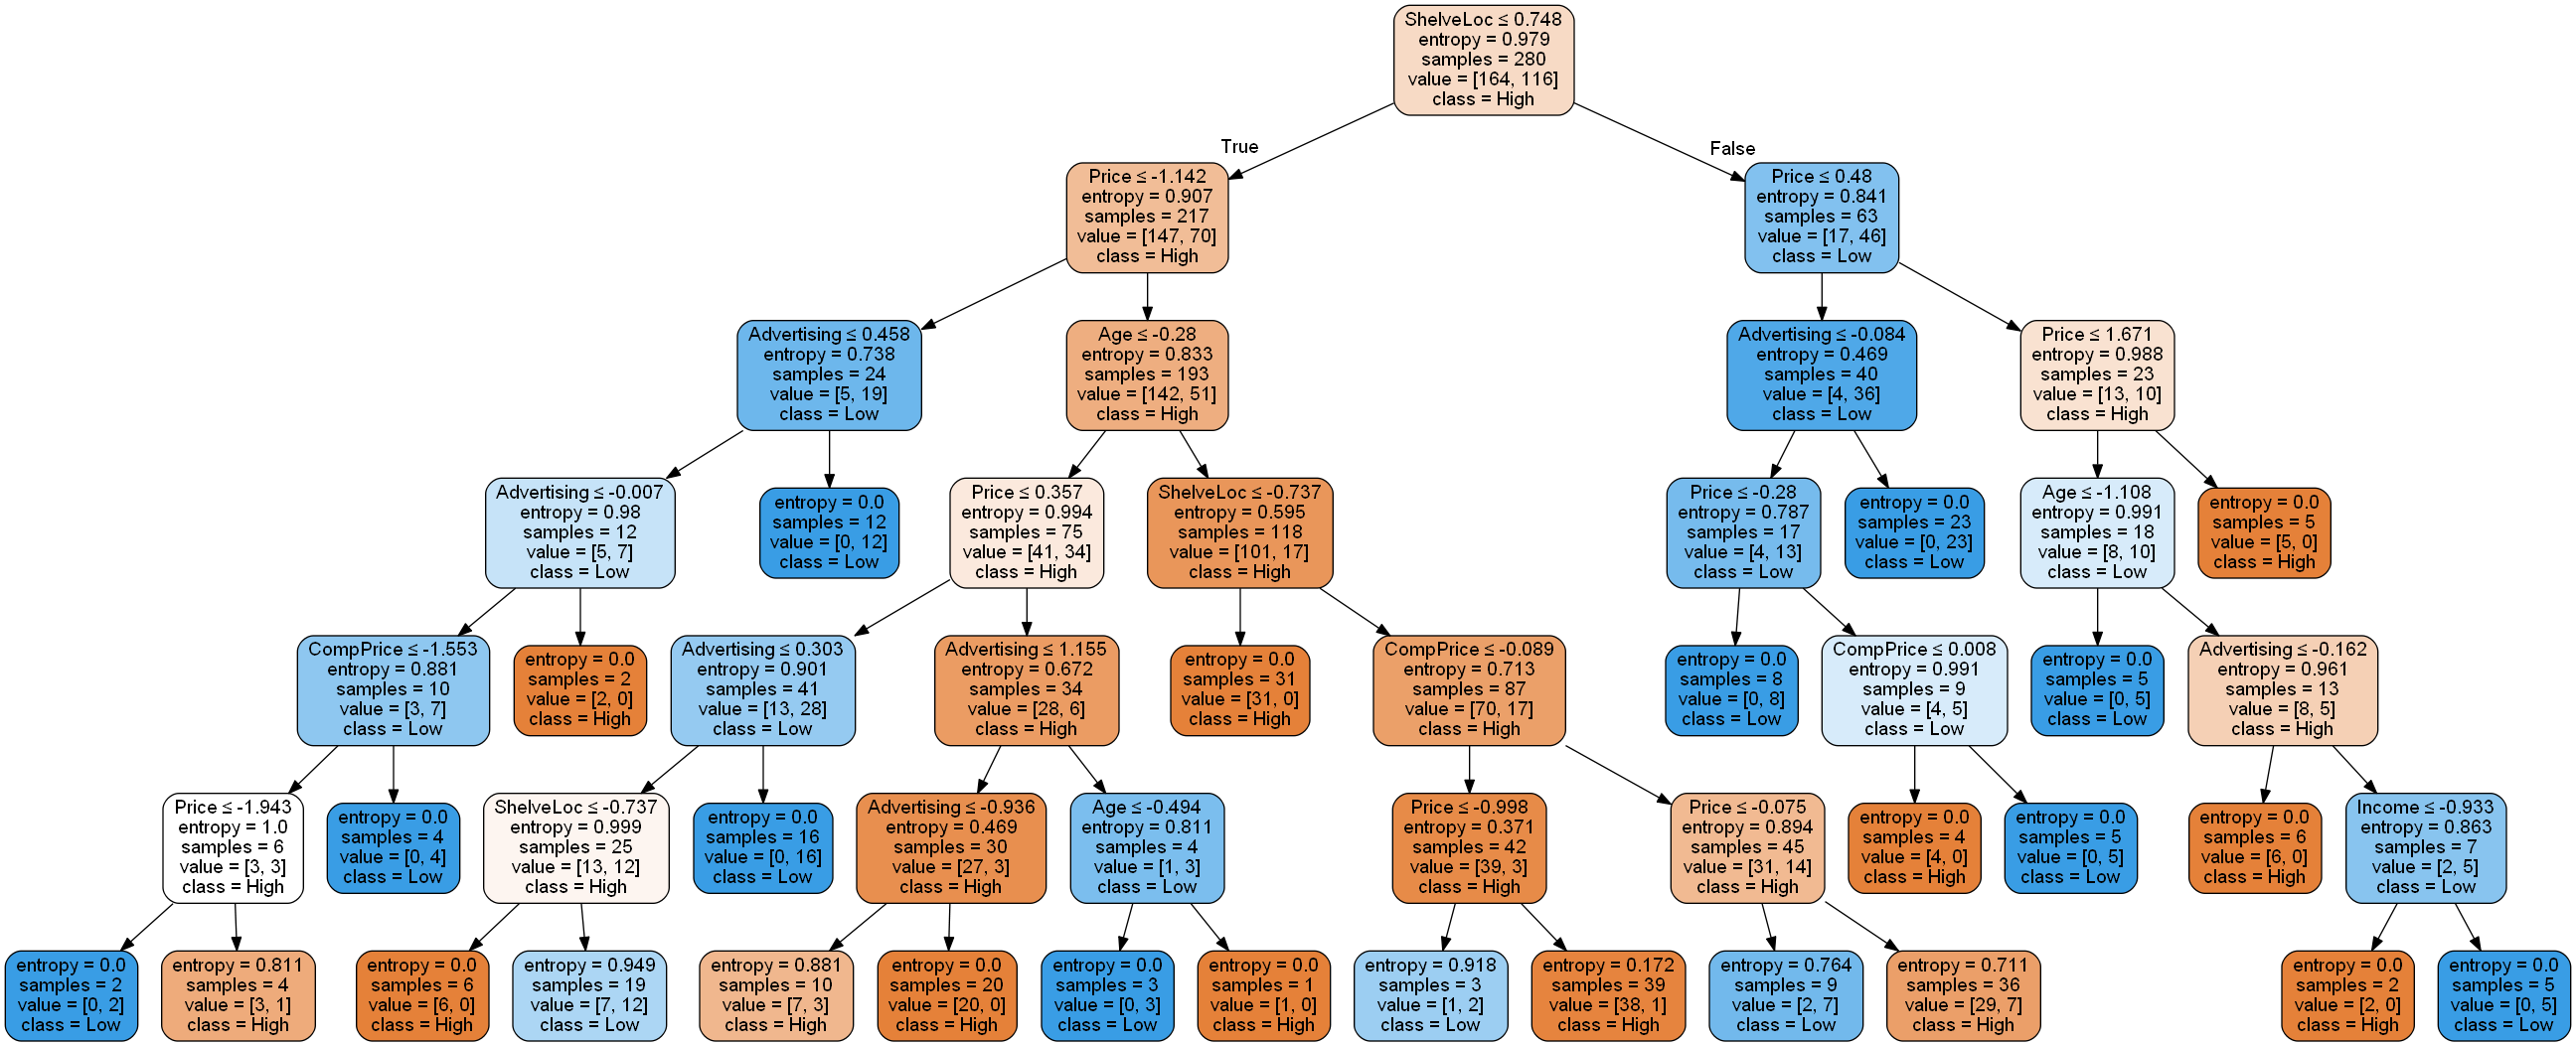

In [137]:
#Graphical Representation
import os

os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/graphviz-2.38/release/bin'

names = ['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education']
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = names,class_names=['High','Low'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())
